In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv("Customers.csv")

In [6]:
# Display first few rows
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [7]:
# (a) Compute Summary Statistics
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [9]:
df = df.dropna(subset=["Profession"])  # Remove rows with missing profession values

In [10]:
# Standardize column names
df.columns = df.columns.str.strip()
df.rename(columns={"Annual Income ($)": "Annual Income"}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_191664\263165187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Annual Income ($)": "Annual Income"}, inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_191664\4150049223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age Group"] = pd.cut(df["Age"], bins=[18, 25, 35, 45, 55, 65, 75], labels=["18-25", "26-35", "36-45", "46-55", "56-65", "66-75"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_191664\4150049223.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["Age Group"], y=df["Annual Income"], ci=None)


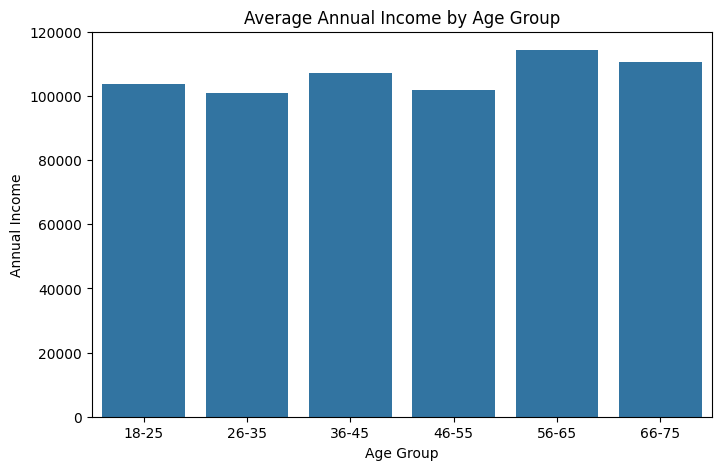

In [11]:
# Average Annual Income by Age Group
df["Age Group"] = pd.cut(df["Age"], bins=[18, 25, 35, 45, 55, 65, 75], labels=["18-25", "26-35", "36-45", "46-55", "56-65", "66-75"])
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Age Group"], y=df["Annual Income"], ci=None)
plt.title("Average Annual Income by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Annual Income")
plt.show()

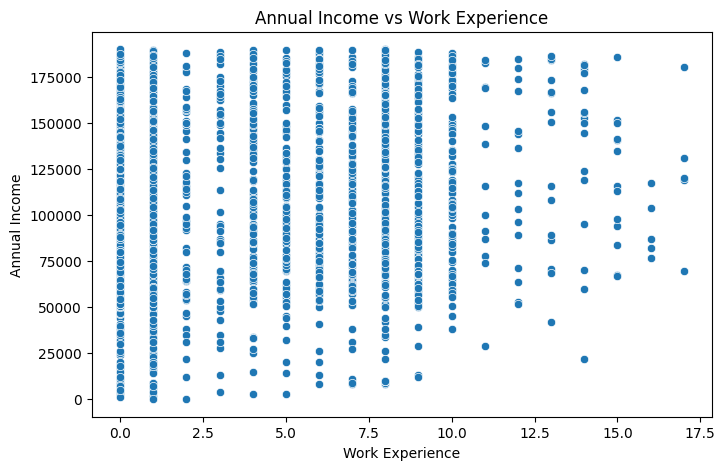

In [12]:
# Annual Income vs Work Experience
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Work Experience"], y=df["Annual Income"])
plt.title("Annual Income vs Work Experience")
plt.xlabel("Work Experience")
plt.ylabel("Annual Income")
plt.show()

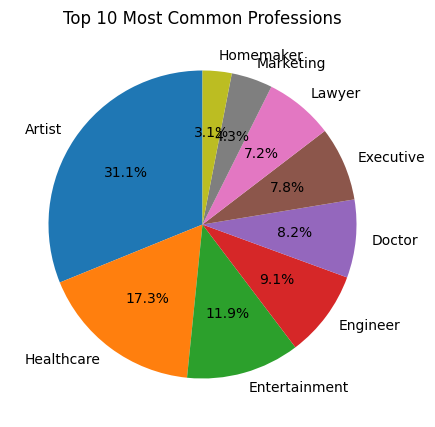

In [13]:
# Most Common Professions
plt.figure(figsize=(8, 5))
df["Profession"].value_counts().head(10).plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("Top 10 Most Common Professions")
plt.ylabel("")
plt.show()

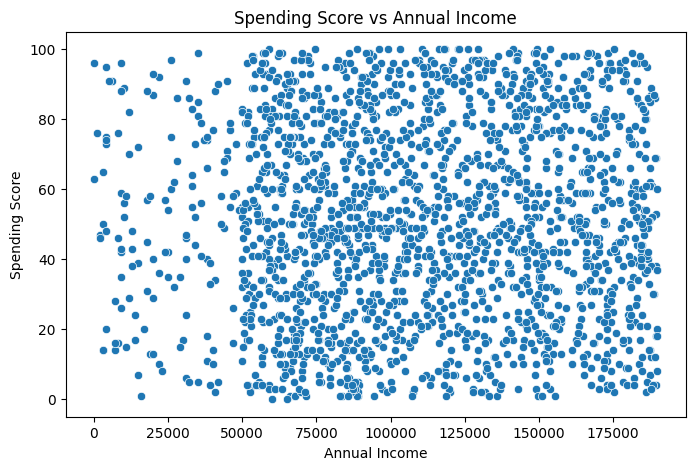

In [14]:
# Spending Score vs Annual Income
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Annual Income"], y=df["Spending Score (1-100)"])
plt.title("Spending Score vs Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_191664\65031496.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Gender"], y=df["Annual Income"], palette="Set2")


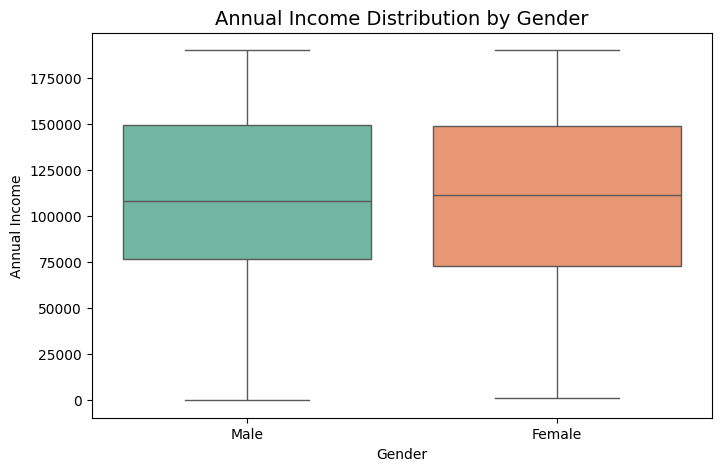

In [15]:
# Gender-wise Income Comparison
if "Gender" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df["Gender"], y=df["Annual Income"], palette="Set2")
    plt.title("Annual Income Distribution by Gender", fontsize=14)
    plt.xlabel("Gender")
    plt.ylabel("Annual Income")
    plt.show()

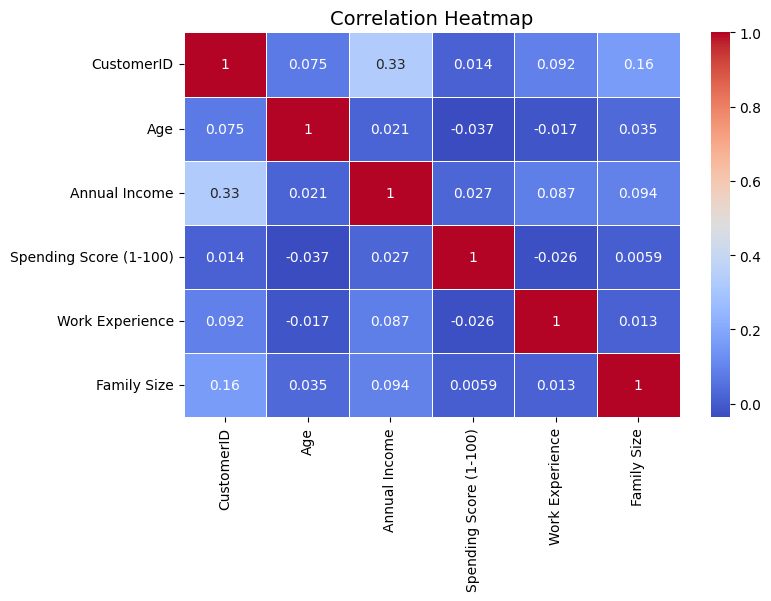

In [16]:
# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()